In [1]:
from glob import glob

In [182]:
fns = glob("/Users/ahakso/odrive/agl/Media/Pictures/iphone full quality/*")
ftypes = set([x.split('.')[-1] for x in fns if x.split('.')[-1] != 'cloud'])
fns = []
for ftype in ftypes:
    fns += glob(f"/Users/ahakso/odrive/agl/Media/Pictures/iphone full quality/*.{ftype}")

In [183]:
raw = pd.DataFrame(
    [
        fns,
        [x.split("/")[-1] for x in fns],
        [pd.Timestamp(datetime.fromtimestamp(os.stat(x).st_birthtime)) for x in fns],
        [pd.Timestamp(datetime.fromtimestamp(os.stat(x).st_mtime)) for x in fns],
        [pd.Timestamp(datetime.fromtimestamp(os.stat(x).st_ctime)) for x in fns],
        [os.stat(x).st_size for x in fns],
    ],
    #     [fns,[x.split('/')[-1] for x in fns], ],
    index=["pth", "fn", "created", "modified","metadata_change","bits"],
).T

In [184]:
df = raw.loc[lambda df: (df.metadata_change > '2022-12-01') & (raw.bits > 1000)]

In [213]:
def dedupe(df):
    if len(df) == 2:
        df.loc[df.fn.str.len().idxmin(),:]
    else:
        return df

In [219]:
deduped = raw.groupby('bits').apply(dedupe)

In [220]:
t = pd.merge(deduped,raw.loc[:,['fn','bits']],on='fn',how='outer')

In [235]:
raw.loc[~raw.fn.str.contains(r'.')]

,pth,fn,created,modified,metadata_change,bits


In [245]:
bad_pths = raw.loc[
    raw.assign(first7=lambda df: df.fn.str[:7]).duplicated(
        subset=["first7", "bits"], keep=False
    )
].loc[lambda df: df.fn.apply(lambda x: x.split(".")[0][-2:] == " 1")]

In [249]:
for dups in bad_pths.pth.values:
    try:
        os.remove(dups)
    except FileNotFoundError:
        pass

In [275]:

     
fns = glob("/Users/ahakso/odrive/agl/Media/Pictures/iphone full quality/*")
ftypes = set([x.split('.')[-1] for x in fns if x.split('.')[-1] not in ('AAE','cloud')])
fns = []
for ftype in ftypes:
    fns += [x for x in glob(f"/Users/ahakso/Pictures/*.{ftype}")]

In [266]:
backed_up = [x.split('/')[-1] for x in glob("/Users/ahakso/odrive/agl/Media/Pictures/iphone full quality/*")]

In [274]:
for fn in fns:
    if fn in backed_up:
        pass
    elif fn.split('.')[0][-2:] not in (' 1',' 2'):
        raise ValueError(f'missing {fn}')

In [276]:
for fn in fns:
    os.remove(fn)

In [255]:
ftypes

{'AAE', 'HEIC', 'JPEG', 'JPG', 'MOV', 'MP4', 'PNG'}

In [243]:
df = raw.head(100)
df.fn.apply(lambda x: x.split(".")[0])

0      IMG_E9506
1       IMG_8861
2       IMG_9773
3       IMG_9289
4       IMG_4141
5       IMG_8532
6      IMG_E5525
7       IMG_0552
8       IMG_8162
9       IMG_7278
10      IMG_5245
11     IMG_E5460
12      IMG_7782
13     IMG_E9910
14      IMG_8027
15     IMG_E9443
16      IMG_8924
17      IMG_9636
18      IMG_0694
19    IMG_9900 1
20      IMG_5496
21      IMG_6740
22      IMG_7852
23     IMG_E6165
24     IMG_E9290
25      IMG_4792
26      IMG_6605
27      IMG_7917
28      IMG_5479
29      IMG_9909
30      IMG_0505
31     IMG_E8710
32      IMG_8135
33      IMG_5357
34      IMG_6982
35      IMG_0155
36      IMG_8565
37     IMG_E4733
38      IMG_4116
39      IMG_9724
40      IMG_4546
41     IMG_E4699
42      IMG_9374
43      IMG_8973
44     IMG_E5964
45      IMG_9231
46     IMG_E9414
47      IMG_4403
48      IMG_0440
49      IMG_7385
50     IMG_E0635
51      IMG_0010
52      IMG_8420
53      IMG_5212
54      PPAC9082
55     IMG_E5437
56      IMG_9118
57     IMG_E6132
58      IMG_95

In [215]:
t.head()

,pth,fn,created,modified,metadata_change,bits_x,bits_y
0,/Users/ahakso/odrive/agl/Media/Pictures/iphone...,IMG_9554 1.AAE,2022-04-18 10:17:11,2022-04-18 10:17:11,2022-12-12 12:11:47.182125,824,824
1,/Users/ahakso/odrive/agl/Media/Pictures/iphone...,IMG_1566 1.AAE,2022-10-30 09:02:00,2022-10-30 09:02:00,2022-12-12 12:26:24.207105,824,824
2,/Users/ahakso/odrive/agl/Media/Pictures/iphone...,IMG_8216.AAE,2022-03-11 06:45:35,2022-03-11 06:45:35,2022-12-11 11:28:45.300578,824,824
3,/Users/ahakso/odrive/agl/Media/Pictures/iphone...,IMG_1627.AAE,2022-11-02 18:40:42,2022-11-02 18:40:42,2022-12-12 11:34:29.145826,824,824
4,/Users/ahakso/odrive/agl/Media/Pictures/iphone...,IMG_0560 2.AAE,2022-07-03 12:58:25,2022-07-03 12:58:25,2022-12-12 12:18:03.843163,824,824


In [221]:
deduped.loc[lambda df: df.fn.str.contains('BEFM8640')]

,,pth,fn,created,modified,metadata_change,bits
bits,,,,,,,


In [212]:
len(raw.loc[[14717,15226],:])#.loc[lambda df: df.fn.str.len().idxmax()]

2

In [207]:
t.sort_values(['bits_y','fn']).loc[t.sort_values(['bits_x','fn']).isna().sum(axis=1).astype(bool)]

,pth,fn,created,modified,metadata_change,bits_x,bits_y
14717,NaN,BEFM8640 1.JPG,NaT,NaT,NaT,NaN,4080812
15226,NaN,BEFM8640.JPG,NaT,NaT,NaT,NaN,4080812
16698,NaN,BOGK7534.JPG,NaT,NaT,NaT,NaN,178660
14863,NaN,BVJX4017.JPG,NaT,NaT,NaT,NaN,1685371
16900,NaN,BVJXE4017.JPG,NaT,NaT,NaT,NaN,1685371
...,...,...,...,...,...,...,...
15556,NaN,WKIFE9865.JPG,NaT,NaT,NaT,NaN,1773656
16687,NaN,XKLP3176 1.JPG,NaT,NaT,NaT,NaN,7256319
15450,NaN,XKLP3176.JPG,NaT,NaT,NaT,NaN,7256319
12324,NaN,XWKC6675 1.MOV,NaT,NaT,NaT,NaN,157427941


<AxesSubplot:xlabel='rnk'>

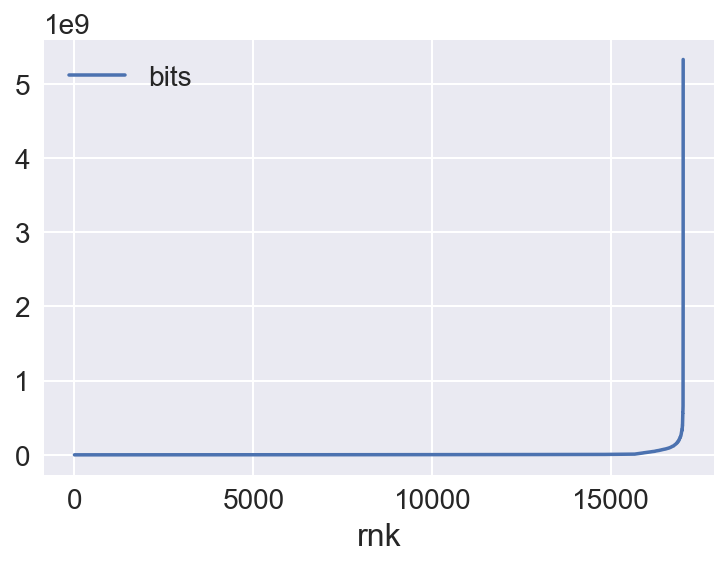

In [179]:
raw.sort_values('bits').assign(rnk=range(len(raw))).plot(x='rnk',y='bits')

<AxesSubplot:>

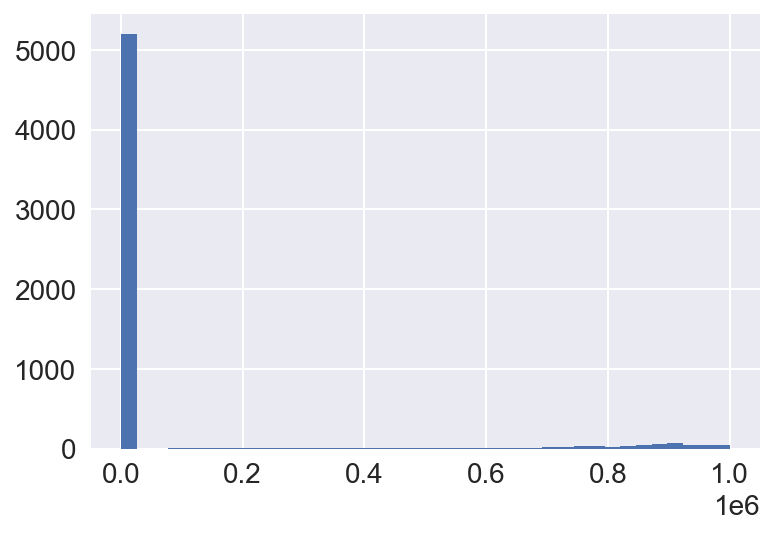

In [175]:
raw.bits.hist(bins=np.linspace(0,1e6,40))

In [140]:
df = raw.loc[lambda df: df.created > '2022-12-01']#.sort_values('created').metadata_change.hist()#.iloc[-1,0]
# plt.gcf().autofmt_xdate()

In [153]:
dr = pd.date_range(df.loc[:,df.dtypes=='datetime64[ns]'].min().min(),df.loc[:,df.dtypes=='datetime64[ns]'].max().max(),freq='2H')
cnts = []
time_cols = df.loc[:,df.dtypes=='datetime64[ns]'].columns
for c in  time_cols:
    tmp = df.assign(interval=pd.cut(df.loc[:,c],dr)).groupby('interval').apply(lambda x: len(x))
    tmp.name = c
    cnts.append(tmp)
cnts = pd.DataFrame(cnts).T

In [154]:
cnts

,created,modified,metadata_change
interval,,,
"(2022-12-01 06:29:57, 2022-12-01 08:29:57]",10,10,0
"(2022-12-01 08:29:57, 2022-12-01 10:29:57]",0,0,0
"(2022-12-01 10:29:57, 2022-12-01 12:29:57]",0,0,0
"(2022-12-01 12:29:57, 2022-12-01 14:29:57]",0,0,0
"(2022-12-01 14:29:57, 2022-12-01 16:29:57]",0,0,0
...,...,...,...
"(2022-12-12 02:29:57, 2022-12-12 04:29:57]",0,0,0
"(2022-12-12 04:29:57, 2022-12-12 06:29:57]",0,0,0
"(2022-12-12 06:29:57, 2022-12-12 08:29:57]",0,0,0


In [157]:
cnts.loc[lambda df: (df==0).sum(axis=1) < 3]

,created,modified,metadata_change
interval,,,
"(2022-12-01 06:29:57, 2022-12-01 08:29:57]",10,10,0
"(2022-12-01 16:29:57, 2022-12-01 18:29:57]",2,2,0
"(2022-12-02 06:29:57, 2022-12-02 08:29:57]",8,8,0
"(2022-12-02 16:29:57, 2022-12-02 18:29:57]",1,1,0
"(2022-12-03 06:29:57, 2022-12-03 08:29:57]",8,8,0
"(2022-12-03 08:29:57, 2022-12-03 10:29:57]",2,2,0
"(2022-12-04 06:29:57, 2022-12-04 08:29:57]",14,14,0
"(2022-12-04 16:29:57, 2022-12-04 18:29:57]",12,12,0
"(2022-12-05 06:29:57, 2022-12-05 08:29:57]",21,21,0


<AxesSubplot:xlabel='interval'>

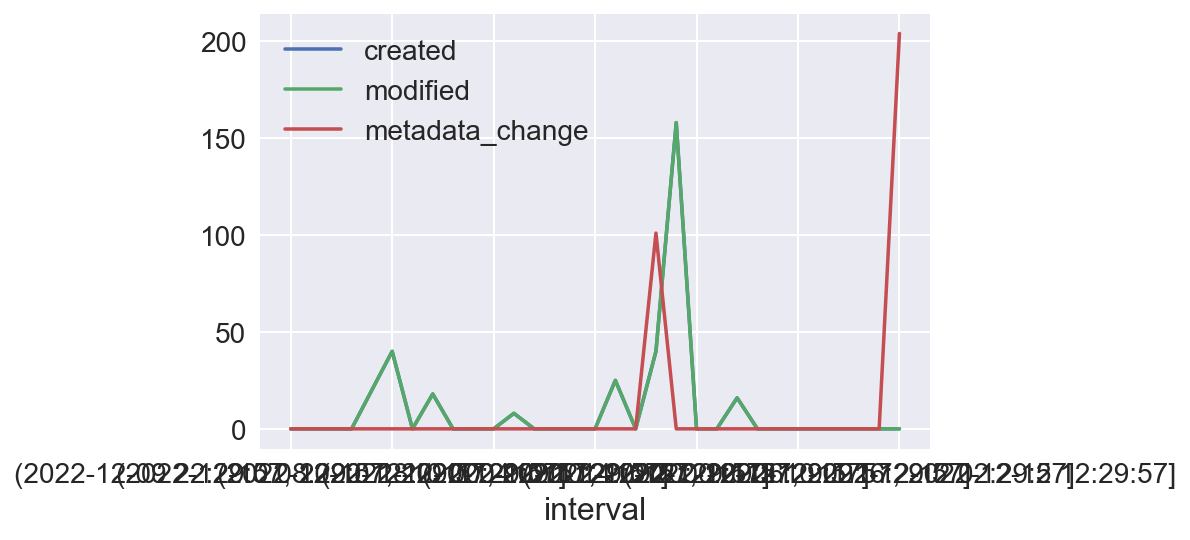

In [156]:
cnts.loc['2022-12-10':,:].plot()